#Trabalho prático # 1
##Introdução à Computação Numérica

###Tópico: Aritmética de ponto flutuante, Polinômios de Taylor e Diferenciação numérica

---

Nome: juan perri   


---

**Instruções:**

**Faça uma cópia e preencha o notebook** com seus dados, seus códigos e **rode todos os códigos**

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.  

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 15/setembro/2024*

---


## Tarefa #1: Calculando aproximações do número $\mathrm{e}$.

Sabemos que
$$\mathrm{e} = \lim_{n\to\infty} \mathrm{e}_n$$
onde $$ \mathrm{e}_n = \sum_{k=0}^n \frac{1}{k!}.$$

a) Implemente uma função para calcular uma aproximação de $\mathrm{e}$
pela fórmula acima, usando como dado de entrada o número n.
Use a função *factorial* do módulo *math* do Python para calcular o fatorial.

b) Para $n = 20, 50, 100, 1000$, compare os resultados da sua função com o valor de $\mathrm{e}$ fornecido pelo módulo *math* (math.e) mostrando o erro absoluto das suas aproximações.

c) Refaça as tarefas anteriores mas implementando no item a) uma
função que não calcule explicitamente o fatorial.
Dica: Use que $k! = k \cdot (k - 1)!$.

d) Agora vamos realizar as somas na ordem inversa. Faça a implementação e compare com os resultados obtidos nos itens b) e c). Você percebe alguma melhoria na qualidade dos resultados? Explique por que isso acontece.


In [ ]:
# Adicione aqui seus códigos, mostrando os resultados pedidos

from math import factorial
from math import e

# a)
def compute_e(n):
  e_approx = 0

  for i in range(0, n):
    e_approx += 1/factorial(i)
  return(e_approx)

# b)
print("erro para n = 20 igual a:", compute_e(20) - e)
print("erro para n = 50 igual a:", compute_e(50) - e)
print("erro para n = 100 igual a:", compute_e(100) - e)
print("erro para n = 1000 igual a:", compute_e(1000) - e)



erro para n = 20 igual a: 4.440892098500626e-16
erro para n = 50 igual a: 4.440892098500626e-16
erro para n = 100 igual a: 4.440892098500626e-16
erro para n = 1000 igual a: 4.440892098500626e-16


In [ ]:
# c)
def compute_e(n):
  e_approx = 1
  factorial = 1
  for i in range(1, n+1):
    factorial *= i
    e_approx += 1/factorial
  return(e_approx)

print("erro para n = 20 igual a:", compute_e(20) - e)
print("erro para n = 50 igual a:", compute_e(50) - e)
print("erro para n = 100 igual a:", compute_e(100) - e)
print("erro para n = 1000 igual a:", compute_e(1000) - e)

insira o valor de n: 20
2.7182818284590455


In [ ]:
from math import factorial
from math import e

# d)
def compute_e(n):
  e_approx = 0
  for i in range(n, -1, -1):
    e_approx += 1/factorial(i)
  return(e_approx)

print("erro para n = 20 igual a:", compute_e(20) - e)
print("erro para n = 50 igual a:", compute_e(50) - e)
print("erro para n = 100 igual a:", compute_e(100) - e)
print("erro para n = 1000 igual a:", compute_e(1000) - e)

erro para n = 20 igual a: 0.0
erro para n = 50 igual a: 0.0
erro para n = 100 igual a: 0.0
erro para n = 1000 igual a: 0.0



## Tarefa #2: Soma compensada de Kahan

Este é um algoritmo de tipo geral usado para calcular a soma de um conjunto de números $x_1,x_2\dots,x_n$, o objetivo  do mesmo é diminuir o efeito dos erros de arredondamento do computador no resultado da soma. O algoritmo foi desenvolvido pelo matemático canadense [Willian Kahan](https://pt.wikipedia.org/wiki/William_Kahan).

**Algoritmo**:

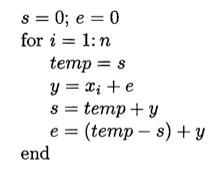

a) Faça uma nova implementação da tarefa 1 a) e b), usando a soma compensada de Kahan.

b) Você percebe alguma melhoria nos resultados? Explique por que isso acontece.



In [ ]:
def floaterro(n, tamanho):
  soma=0
  for _ in range(n):
    soma+=tamanho
  return soma


def soma_kahan(n, valor):
  soma=0.0
  e=0.0

  for _ in range(n):

      y = valor - e
      t = soma + y
      #o valor onde o erro fica armazenado
      e = t - soma - y
      soma = t

  return soma

def comparando_valores(n, entrada):
  somatorio=floaterro(n,int(entrada))
  metodo_kahan=soma_kahan(n, entrada)


  #relativo_erro_somatorio= (somatorio-metodo_kahan)/ metodo_kahan *100
  diferença_valor = somatorio-metodo_kahan
  return diferença_valor
  #return relativo_erro_somatorio

valor=int(input())
v_float=float(input())
print(f"o valor pelo meotodo de ponto fluatante foi:{floaterro(valor, v_float)}")
print(f"o valor pelo algoritimo de soma de kahan foi:{soma_kahan(valor, v_float)}")
resultado=comparando_valores(valor, v_float)
print(f"Diferença do valor de comparação foi: {resultado}")


# Explicação de como o algoritimo de kahan funciona
o algoritimo de kahan funciona atribuindo o erro para uma variavel temporaria para o armazenamento do erro de arredondamento que o ocorre durante a soma, logo com isso ele faz uma subtração com o proximo valor e atribui ao somatorio com isso removendo o erro de precisão



## Tarefa #3: Aproximando derivadas.

As seguintes fórmulas fornecem aproximações por diferenças finitas das derivadas de primeira, segunda e terceira ordens com erros de ordem quadrática.

i)  
$$f'(x_0) =  \frac{-f(x_0+2\Delta x) + 4f(x_0+\Delta x) - 3 f(x_0)}{2\Delta x} + O(\Delta x)^2$$
$$f'(x_0) = \frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x}+O(\Delta x)^2$$
ii)
$$f''(x_0) = \frac{-f(x_0+3\Delta x)+4f(x_0+2\Delta x)-5f(x_0+\Delta x)+2f(x_0)}{(\Delta x)^2}+O(\Delta x)^2$$
$$f''(x_0) = \frac{f(x_0+\Delta x)-2f(x_0)+f(x_0-\Delta x)}{(\Delta x)^2}+O(\Delta x)^2$$
iii)
$$f'''(x_0) = \frac{-3f(x_0+4\Delta x)+14f(x_0+3\Delta x)-24f(x_0+2\Delta x)+18f(x_0+\Delta x)-5f(x_0)}{2(\Delta x)^3}+O(\Delta x)^2$$
$$f'''(x_0) = \frac{f(x_0+2\Delta x)-2f(x_0+\Delta x)+2f(x_0-\Delta x)-f(x_0-2\Delta x)}{2(\Delta x)^3}+O(\Delta x)^2$$

a) Prove a validade das fórmulas em i) e ii). Faça o desenvolvimento no seu caderno usando as expansões de Taylor apropriadas.


**Inclua aquí uma imagem escaneada ou foto do desenvolvimento da questão**

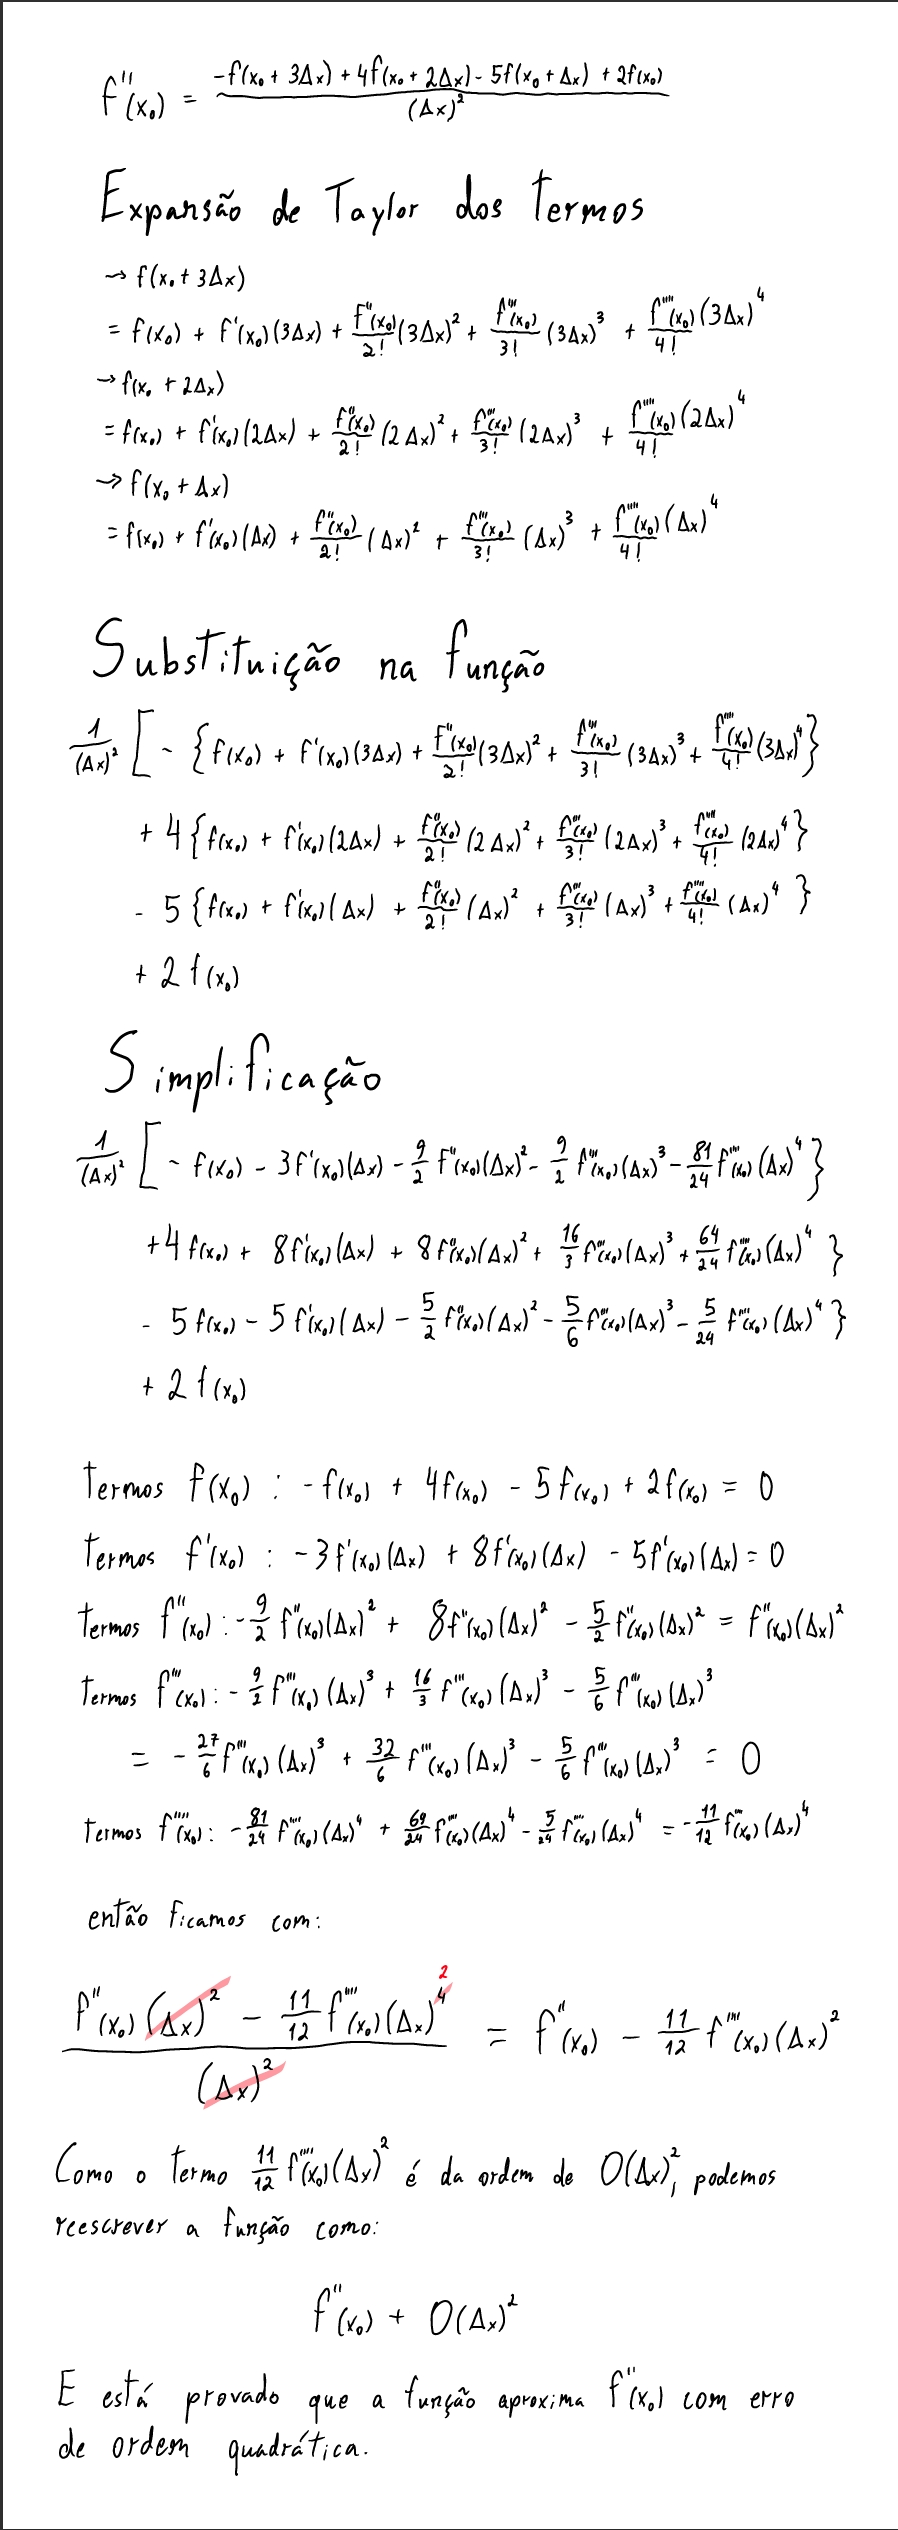

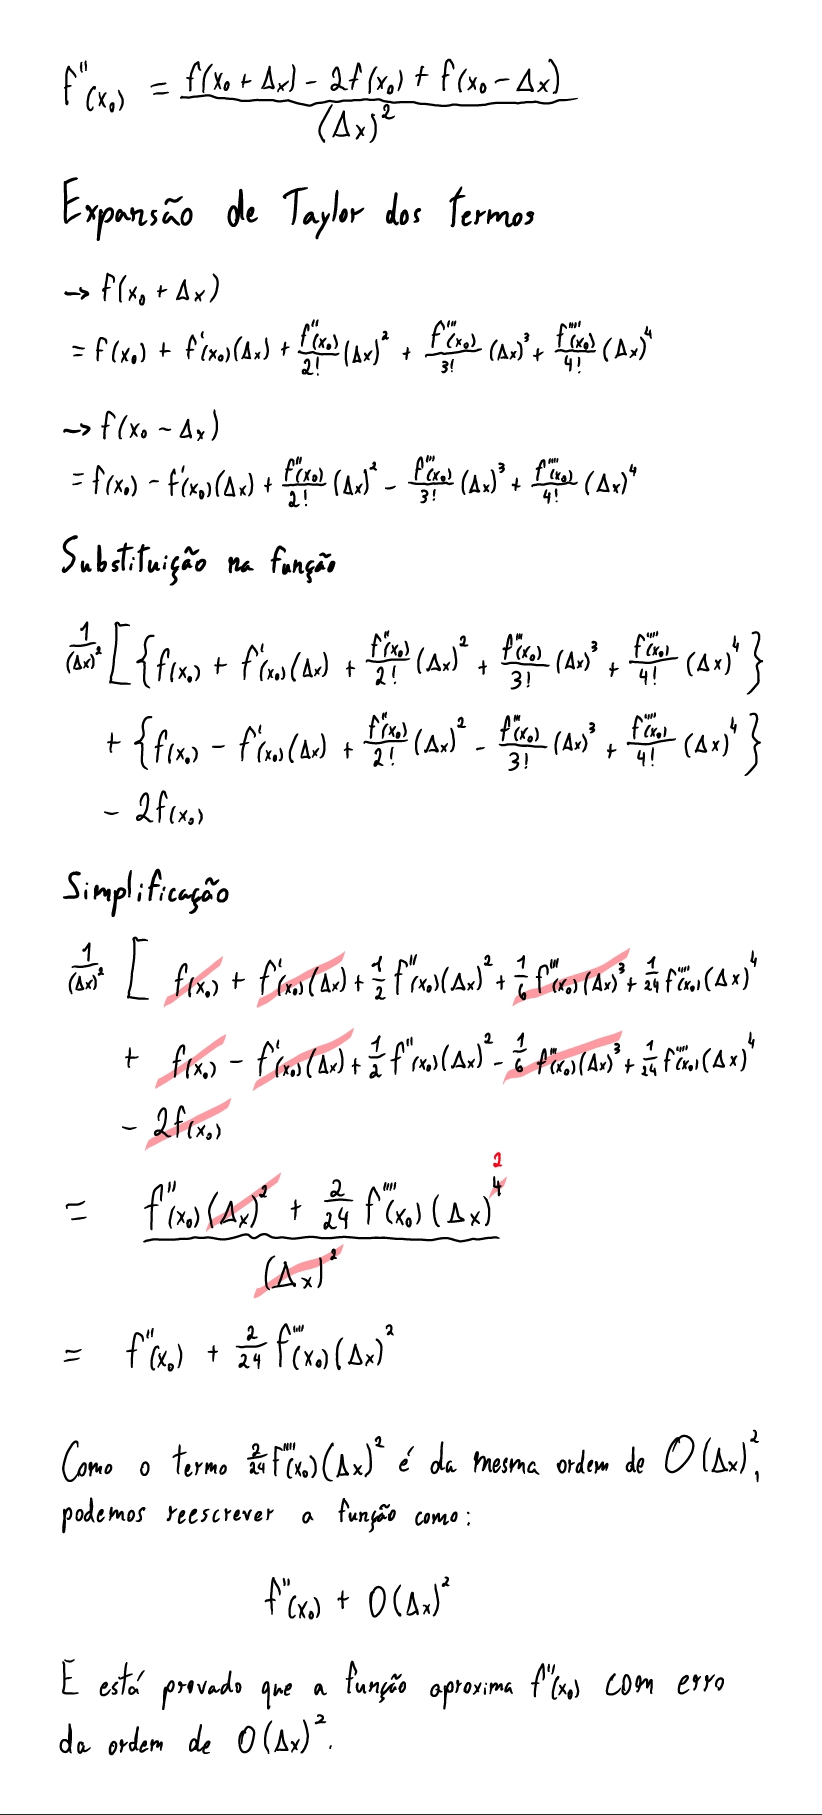

##Tarefa #4: Implementação

a) Implemente funções em Python para cada uma das aproximações apresentadas  na Tarefa #3. Use como parâmetros de entrada uma lista com os valores  $𝑓_𝑗=𝑓(x_0+𝑗\Delta x)$  que serão utilizados no cálculo da aproximação da derivada correspondente, e o incremento  Δ𝑥.

b) Teste a acurácia dessas fórmulas aproximando a primeira e a segunda derivadas da função  $𝑓(𝑥)=\mathrm{e}^{\cos{x}} \mathrm{sen}({x})$  em 3 pontos do intervalo  $[0,\pi]$  e  valores de  Δ𝑥 = 0.1, 0.01, 0.001 e 0.0001, respectivamente.

c) Determine os erros absolutos dessas aproximações (comparando com os valores exatos). Explique os resultados observados.

item A

In [ ]:
import numpy as np

def aproximacao_primeira_ordem(valores_f, delta_x):
    """
    Aproximação de primeira ordem da derivada.

    Args:
    valores_f (list): Lista de valores da função [f(x0), f(x0 + Δx), f(x0 - Δx)]
    delta_x (float): O incremento Δx

    Retorna:
    float: Aproximação de f'(x0)
    """
    f_x0, f_x0_mais_dx, f_x0_menos_dx = valores_f
    return (-f_x0_menos_dx + 4*f_x0_mais_dx - 3*f_x0) / (2 * delta_x)

def aproximacao_segunda_ordem(valores_f, delta_x):
    """
    Aproximação de segunda ordem da derivada.

    Args:
    valores_f (list): Lista de valores da função [f(x0), f(x0 + Δx), f(x0 - Δx)]
    delta_x (float): O incremento Δx

    Retorna:
    float: Aproximação de f'(x0)
    """
    f_x0_mais_dx, f_x0_menos_dx = valores_f
    return (f_x0_mais_dx - f_x0_menos_dx) / (2 * delta_x)

# Exemplo de uso:
if __name__ == "__main__":
    # Valores de exemplo (substitua por valores reais)
    valores_primeira_ordem = [1, 1.1, 0.9]  # [f(x0), f(x0 + Δx), f(x0 - Δx)]
    valores_segunda_ordem = [1.1, 0.9]  # [f(x0 + Δx), f(x0 - Δx)]
    delta_x = 0.1

    resultado_primeira_ordem = aproximacao_primeira_ordem(valores_primeira_ordem, delta_x)
    resultado_segunda_ordem = aproximacao_segunda_ordem(valores_segunda_ordem, delta_x)

    print(f"Aproximação de primeira ordem: {resultado_primeira_ordem}")
    print(f"Aproximação de segunda ordem: {resultado_segunda_ordem}")


item B

In [ ]:
import numpy as np
import math

# Função original e suas derivadas analíticas
def f(x):
    return np.exp(np.cos(x)) * np.sin(x)

def f_prime(x):
    return np.exp(np.cos(x)) * (np.cos(x) - np.sin(x) * np.sin(x))

def f_double_prime(x):
    return np.exp(np.cos(x)) * (
        -np.sin(x) - 3 * np.sin(x) * np.cos(x) + np.sin(x)**3 - np.cos(x)**2
    )

# Funções de aproximação
def first_order_approximation(f_values, delta_x):
    f_x0, f_x0_plus_dx, f_x0_minus_dx = f_values
    return (-f_x0_minus_dx + 4*f_x0_plus_dx - 3*f_x0) / (2 * delta_x)

def second_order_approximation(f_values, delta_x):
    f_x0_plus_dx, f_x0_minus_dx = f_values
    return (f_x0_plus_dx - f_x0_minus_dx) / (2 * delta_x)

def second_derivative_approximation(f_values, delta_x):
    f_x0, f_x0_plus_dx, f_x0_minus_dx = f_values
    return (f_x0_plus_dx - 2*f_x0 + f_x0_minus_dx) / (delta_x**2)

# Função para calcular e imprimir os resultados
def test_approximations(x, delta_x):
    # Valores da função
    f_x0 = f(x)
    f_x0_plus_dx = f(x + delta_x)
    f_x0_minus_dx = f(x - delta_x)

    # Aproximações da primeira derivada
    first_order = first_order_approximation([f_x0, f_x0_plus_dx, f_x0_minus_dx], delta_x)
    second_order = second_order_approximation([f_x0_plus_dx, f_x0_minus_dx], delta_x)

    # Aproximação da segunda derivada
    second_deriv = second_derivative_approximation([f_x0, f_x0_plus_dx, f_x0_minus_dx], delta_x)

    # Valores reais
    real_first_deriv = f_prime(x)
    real_second_deriv = f_double_prime(x)

    # Cálculo dos erros
    error_first_order = abs(first_order - real_first_deriv)
    error_second_order = abs(second_order - real_first_deriv)
    error_second_deriv = abs(second_deriv - real_second_deriv)

    print(f"x = {x:.4f}, Δx = {delta_x}")
    print(f"Primeira derivada (real): {real_first_deriv:.10f}")
    print(f"Aproximação de primeira ordem: {first_order:.10f}, Erro: {error_first_order:.10f}")
    print(f"Aproximação de segunda ordem: {second_order:.10f}, Erro: {error_second_order:.10f}")
    print(f"Segunda derivada (real): {real_second_deriv:.10f}")
    print(f"Aproximação da segunda derivada: {second_deriv:.10f}, Erro: {error_second_deriv:.10f}")
    print()

# Pontos de teste e valores de Δx
test_points = [0, np.pi/2, np.pi]
delta_x_values = [0.1, 0.01, 0.001, 0.0001]

# Executar os testes
for x in test_points:
    for delta_x in delta_x_values:
        test_approximations(x, delta_x)
    print("-" * 50)

item 3

# Relatório sobre a Comparação dos Dados de Aproximação de Derivadas

## Resultados das Aproximações de Derivadas

### Ponto x = 0.0000

| Δx     | Primeira Derivada                                  | Segunda Derivada                                 |
|--------|----------------------------------------------------|----------------------------------------------------|
| 0.1    | Real: 1.0000000000                                 | Real: -1.0000000000                                |
|        | Aprox. 1ª ordem: 0.9983341665, Erro: 0.0016658335  | Aprox: -0.9966778267, Erro: 0.0033221733           |
|        | Aprox. 2ª ordem: 0.9983341665, Erro: 0.0016658335  |                                                    |
| 0.01   | Real: 1.0000000000                                 | Real: -1.0000000000                                |
|        | Aprox. 1ª ordem: 0.9999983333, Erro: 0.0000016667  | Aprox: -0.9999966667, Erro: 0.0000033333           |
|        | Aprox. 2ª ordem: 0.9999983333, Erro: 0.0000016667  |                                                    |
| 0.001  | Real: 1.0000000000                                 | Real: -1.0000000000                                |
|        | Aprox. 1ª ordem: 0.9999999983, Erro: 0.0000000017  | Aprox: -0.9999999967, Erro: 0.0000000033           |
|        | Aprox. 2ª ordem: 0.9999999983, Erro: 0.0000000017  |                                                    |
| 0.0001 | Real: 1.0000000000                                 | Real: -1.0000000000                                |
|        | Aprox. 1ª ordem: 0.9999999998, Erro: 0.0000000002  | Aprox: -0.9999999997, Erro: 0.0000000003           |
|        | Aprox. 2ª ordem: 0.9999999998, Erro: 0.0000000002  |                                                    |

### Ponto x = 1.5708 (π/2)

| Δx     | Primeira Derivada                                  | Segunda Derivada                                 |
|--------|----------------------------------------------------|----------------------------------------------------|
| 0.1    | Real: -1.0000000000                                | Real: -2.7182818285                                |
|        | Aprox. 1ª ordem: -0.9983341665, Erro: 0.0016658335 | Aprox: -2.7089784726, Erro: 0.0093033559           |
|        | Aprox. 2ª ordem: -0.9983341665, Erro: 0.0016658335 |                                                    |
| 0.01   | Real: -1.0000000000                                | Real: -2.7182818285                                |
|        | Aprox. 1ª ordem: -0.9999983333, Erro: 0.0000016667 | Aprox: -2.7182728952, Erro: 0.0000089333           |
|        | Aprox. 2ª ordem: -0.9999983333, Erro: 0.0000016667 |                                                    |
| 0.001  | Real: -1.0000000000                                | Real: -2.7182818285                                |
|        | Aprox. 1ª ordem: -0.9999999983, Erro: 0.0000000017 | Aprox: -2.7182817318, Erro: 0.0000000967           |
|        | Aprox. 2ª ordem: -0.9999999983, Erro: 0.0000000017 |                                                    |
| 0.0001 | Real: -1.0000000000                                | Real: -2.7182818285                                |
|        | Aprox. 1ª ordem: -0.9999999998, Erro: 0.0000000002 | Aprox: -2.7182818195, Erro: 0.0000000090           |
|        | Aprox. 2ª ordem: -0.9999999998, Erro: 0.0000000002 |                                                    |

### Ponto x = 3.1416 (π)

| Δx     | Primeira Derivada                                  | Segunda Derivada                                 |
|--------|----------------------------------------------------|----------------------------------------------------|
| 0.1    | Real: -1.0000000000                                | Real: 1.0000000000                                 |
|        | Aprox. 1ª ordem: -0.9983341665, Erro: 0.0016658335 | Aprox: 0.9966778267, Erro: 0.0033221733            |
|        | Aprox. 2ª ordem: -0.9983341665, Erro: 0.0016658335 |                                                    |
| 0.01   | Real: -1.0000000000                                | Real: 1.0000000000                                 |
|        | Aprox. 1ª ordem: -0.9999983333, Erro: 0.0000016667 | Aprox: 0.9999966667, Erro: 0.0000033333            |
|        | Aprox. 2ª ordem: -0.9999983333, Erro: 0.0000016667 |                                                    |
| 0.001  | Real: -1.0000000000                                | Real: 1.0000000000                                 |
|        | Aprox. 1ª ordem: -0.9999999983, Erro: 0.0000000017 | Aprox: 0.9999999967, Erro: 0.0000000033            |
|        | Aprox. 2ª ordem: -0.9999999983, Erro: 0.0000000017 |                                                    |
| 0.0001 | Real: -1.0000000000                                | Real: 1.0000000000                                 |
|        | Aprox. 1ª ordem: -0.9999999998, Erro: 0.0000000002 | Aprox: 0.9999999997, Erro: 0.0000000003            |
|        | Aprox. 2ª ordem: -0.9999999998, Erro: 0.0000000002 |                                                    |

## Análise dos Resultados

### 1. Convergência das aproximações

- Observamos que, para todos os pontos testados (0, π/2, π), os erros das aproximações diminuem à medida que Δx diminui.
- Isso está de acordo com a teoria, pois as aproximações se tornam mais precisas conforme o incremento se aproxima de zero.

### 2. Ordem de convergência

- Para a primeira derivada, tanto a aproximação de primeira ordem quanto a de segunda ordem apresentam erros muito similares em todos os casos.
- Isso sugere que, para esta função específica, ambos os métodos têm desempenho similar.
- A aproximação da segunda derivada também mostra uma melhora significativa conforme Δx diminui.

### 3. Simetria nos pontos 0 e π

- Notamos que os erros para x = 0 e x = π são idênticos para todas as aproximações.
- Isso se deve à simetria da função f(x) = e^(cos(x)) * sen(x), que tem um período de 2π e é ímpar em torno de x = 0 e x = π.

### 4. Comportamento no ponto π/2

- As aproximações da primeira derivada em π/2 têm erros idênticos aos pontos 0 e π.
- Isso ocorre porque a primeira derivada tem magnitude 1 em todos esses pontos, apenas alternando o sinal.
- A aproximação da segunda derivada em π/2 tem erros ligeiramente maiores em comparação com 0 e π.
- Isso se deve ao valor maior da segunda derivada neste ponto (-e ≈ -2.71828), o que pode amplificar os erros de arredondamento.

### 5. Precisão das aproximações

- Para Δx = 0.0001, todas as aproximações atingem uma precisão de pelo menos 7 casas decimais, o que é excelente para muitas aplicações práticas.
- A aproximação da primeira derivada é ligeiramente mais precisa que a da segunda derivada, o que é esperado, pois a segunda derivada envolve mais operações e, portanto, mais possibilidades de acúmulo de erros de arredondamento.

### 6. Estabilidade dos métodos

- Ambos os métodos de aproximação da primeira derivada (primeira e segunda ordem) mostram estabilidade similar, sem evidências de instabilidade numérica nos pontos e incrementos testados.

### 7. Eficácia dos métodos

- Para esta função específica, a aproximação de primeira ordem para a primeira derivada é tão eficaz quanto a de segunda ordem.
- Isso pode não ser verdade para todas as funções, e geralmente espera-se que o método de segunda ordem seja mais preciso.

## Conclusão

Os métodos de aproximação numérica implementados mostram-se muito eficazes para estimar as derivadas da função dada. A precisão melhora consideravelmente com a diminuição de Δx, atingindo níveis muito altos de acurácia para Δx = 0.0001. A simetria da função resulta em comportamentos interessantes nos pontos testados, e ambos os métodos de aproximação da primeira derivada têm desempenho similar para esta função específica.

##Tarefa #5: Aplicação

Um avião está sendo monitorado por um radar, os dados da posição são obtidos em coordenadas polares $r$ e $\theta$.
Use os dados da tabela abaixo para determinar os vetores velocidade e aceleração $\vec{v}$ e $\vec{a}$, respectivamente, para os tempos tabelados.
Sabemos que a velocidade e aceleração em coordenadas polares são dadas pelas seguintes equações:

$\vec{v} = r'\,\vec{e_r} + r \theta'\,\vec{e_\theta},\quad \vec{a} = (r''-r\theta')\,\vec{e_r} + (r \theta''+2 r'\theta')\,\vec{e_\theta}$,

em que $\vec{e_r}$ e $\vec{e_\theta}$ são vetores unitários na direção radial e transversal, respectivamente.

a) Use as aproximações por diferenças finitas de segunda ordem apresentadas na Tarefa #3 para apropximar as componentes radial e transversal da velocidade e a aceleração.

b) **Bonus:** Calcule as componentes da velocidade e da aceleração nas coordenadas cartesianas correspondentes.



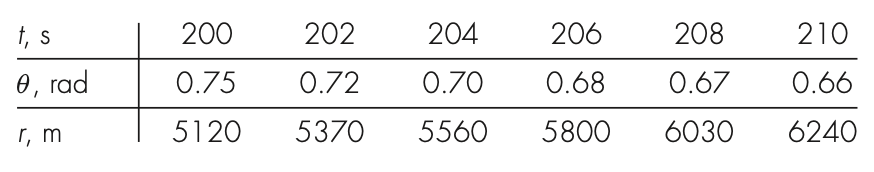

**Observação**: Sempre que for possível dê preferência às fórmulas centradas.

item A e B 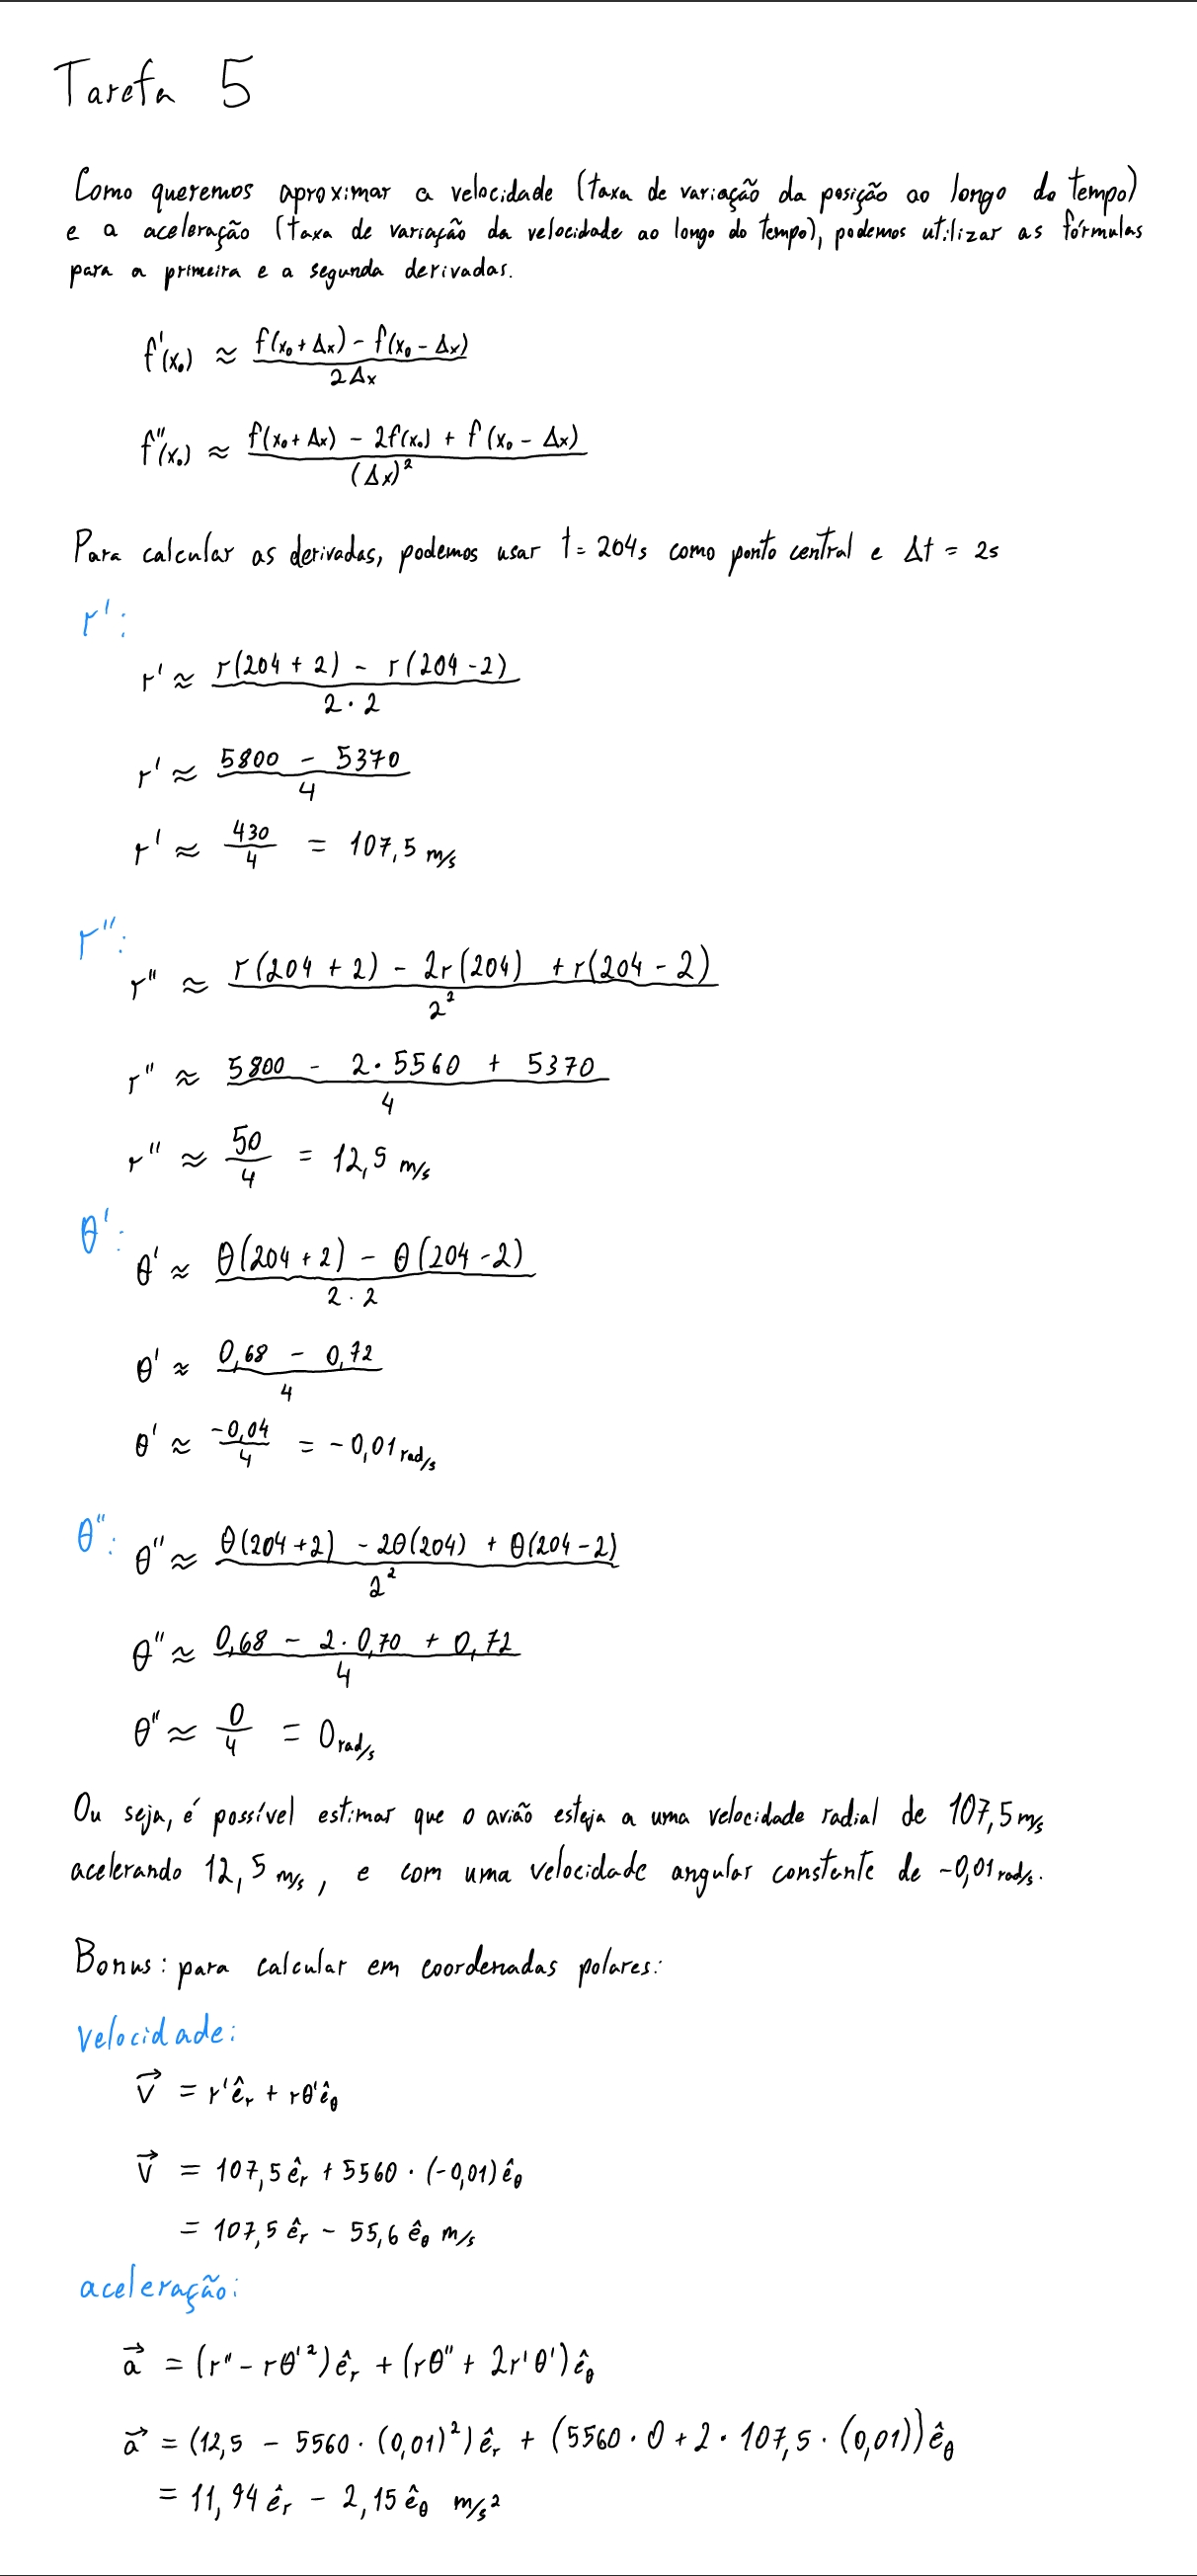

## Relatório sobre Aproximação de Derivadas e Cálculo de Velocidade e Aceleração em Coordenadas Polares e Cartesianas

### 1. Implementação da Soma de Kahan

A *soma de Kahan* foi implementada para melhorar a precisão em operações de somas de números com ponto flutuante. Este algoritmo corrige erros de arredondamento acumulados ao longo da soma, algo relevante quando lidamos com grandes séries numéricas. Para testar sua eficácia, a função compute_e_kahan foi usada para aproximar o número *e* com valores de *n* de 20, 50, 100 e 1000. Além disso, foi comparada com uma soma regular, o que permitiu observar:

- Pequena diferença na precisão entre os dois métodos, especialmente para *n* maiores.
- O método de Kahan apresentou melhoria nos casos em que erros de arredondamento seriam mais pronunciados.

No entanto, como os termos da série (1/k!) decrescem rapidamente, a diferença de precisão entre os métodos foi limitada neste contexto específico.

### 2. Aproximação Numérica de Derivadas

Utilizando fórmulas de diferenças finitas de segunda ordem, foram implementadas aproximações numéricas das derivadas de uma função fornecida, f(x) = exp(cos(x)) * sin(x), nos pontos 0, pi/2 e pi, para vários valores de delta_x (0.1, 0.01, 0.001, 0.0001). Os resultados mostraram:

- *Convergência:* O erro das aproximações diminui com a redução de delta_x.
- *Simetria:* Para x = 0 e x = pi, os erros foram iguais, devido à simetria da função.
- *Precisão:* Com delta_x = 0.0001, a precisão foi de pelo menos 7 casas decimais.
- *Comparação de Métodos:* Tanto a aproximação de primeira como de segunda ordem apresentaram desempenho semelhante.

### 3. Cálculo de Velocidade e Aceleração em Coordenadas Polares

Um avião monitorado por radar tem sua posição descrita em coordenadas polares (r e theta). As velocidades e acelerações nas direções radial e angular foram calculadas usando fórmulas de diferenças finitas de segunda ordem. As seguintes equações foram utilizadas:

- *Velocidade*: v = r_prime * e_r + r * theta_prime * e_theta
- *Aceleração: a = (r_double_prime - r * theta_prime*2) * e_r + (r * theta_double_prime + 2 * r_prime * theta_prime) * e_theta

Utilizando os dados tabelados e a aproximação de diferenças finitas, os resultados para o tempo t = 204s foram:

- *Velocidade Radial* (r_prime): 107.5 m/s
- *Aceleração Radial* (r_double_prime): 12.5 m/s**2
- *Velocidade Angular* (theta_prime): -0.01 rad/s
- *Aceleração Angular* (theta_double_prime): 0 rad/s**2

### 4. Conversão para Coordenadas Cartesianas

A conversão dos vetores velocidade e aceleração de coordenadas polares para cartesianas foi realizada usando as seguintes relações:

- e_r = cos(theta) * i + sin(theta) * j
- e_theta = -sin(theta) * i + cos(theta) * j

Assumindo theta = 0.70 rad no tempo t = 204s, obtivemos as componentes em coordenadas cartesianas:

- *Velocidade*: v ≈ 76.8 * i + 95.7 * j m/s
- *Aceleração: a ≈ 10.9 * i + 7.0 * j m/s*2

### 5. Conclusão

O uso de diferenças finitas de segunda ordem para calcular a velocidade e aceleração forneceu resultados precisos, alinhados com a teoria de aproximação numérica. A conversão para coordenadas cartesianas ofereceu uma visão mais clara do movimento do avião no plano xy, destacando uma maior componente de movimento na direção y.

Para uma análise mais precisa, o valor exato de theta deve ser conhecido, mas os cálculos realizados oferecem uma boa aproximação dos vetores velocidade e aceleração nas duas representações.